In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [208]:
data=pd.read_csv('nyc_taxi_trip_duration Dataset.csv')

In [209]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [210]:
#checking the null values. We see there is no null values
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [211]:
#checking data types
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [212]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [213]:
data['trip_duration_hour']=data['trip_duration'].apply(lambda x: x/3600)
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration_hour
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,0.111111
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,0.305556
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,0.454167
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,0.316944
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,0.235556


In [214]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,trip_duration_hour
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05,729322.000000
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02,0.264508
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03,1.073507
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00,0.000278
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02,0.110278
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02,0.184167
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03,0.298611
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06,538.815556


<AxesSubplot:xlabel='trip_duration_hour'>

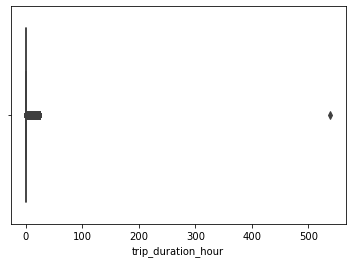

In [215]:
sns.boxplot(data['trip_duration_hour'])

Here, we can clearly see there is outlier, at the extremes. We need to remove these outliers now, before proceeding further.

In [97]:
data['trip_duration_hour'].sort_values(ascending=False)

21813     538.815556
259437     23.997500
119185     23.996389
177225     23.993889
496391     23.993611
             ...    
672240      0.000278
102646      0.000278
533760      0.000278
512833      0.000278
622664      0.000278
Name: trip_duration_hour, Length: 729322, dtype: float64

The row number 21813 has a very high value which contributes to outliers, hence, we will remove this row.

In [99]:
data.drop(data.index[21813],inplace=True)  #Removing 21813th row

In [100]:
data['trip_duration_hour'].sort_values(ascending=False)

259437    23.997500
119185    23.996389
177225    23.993889
496391    23.993611
90557     23.991389
            ...    
672240     0.000278
102646     0.000278
533760     0.000278
512833     0.000278
622664     0.000278
Name: trip_duration_hour, Length: 729321, dtype: float64

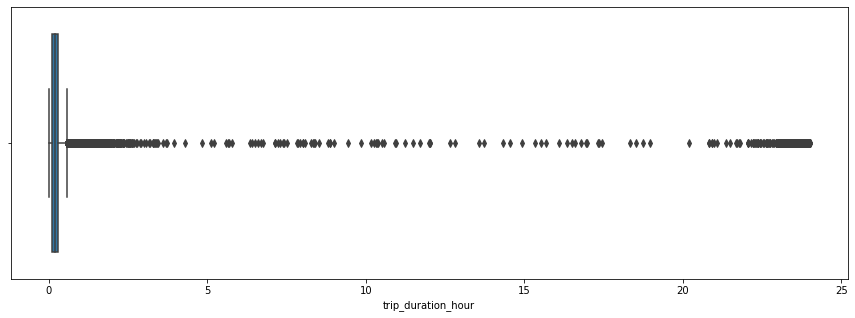

In [101]:
plt.figure(figsize=(15,5))
sns.boxplot(data['trip_duration_hour'])

plt.show()

In [102]:
data=data[data['passenger_count']!=0]
data=data[data['passenger_count']<=6]

In [103]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration_hour
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,0.111111
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,0.305556
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,0.454167
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,0.316944
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,0.235556


In [104]:
data['passenger_count'].value_counts()

1    517414
2    105097
5     38926
3     29692
6     24107
4     14050
Name: passenger_count, dtype: int64

In [105]:
data.drop(columns=['trip_duration'], inplace=True)

In [106]:
data.shape

(729286, 11)

# KNN Model

In [107]:
df = pd.concat([data, pd.get_dummies(data[['passenger_count']].astype('str'))], axis=1)
try:
    df.drop(['id','vendor_id','trip_duration_hour','pickup_datetime','dropoff_datetime','store_and_fwd_flag','passenger_count'], axis=1, inplace=True)
except KeyError:
    pass

df.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6
0,-73.953918,40.778873,-73.963875,40.771164,1,0,0,0,0,0
1,-73.988312,40.731743,-73.994751,40.694931,0,1,0,0,0,0
2,-73.997314,40.721458,-73.948029,40.774918,0,1,0,0,0,0
3,-73.961670,40.759720,-73.956779,40.780628,0,0,0,0,0,1
4,-74.017120,40.708469,-73.988182,40.740631,1,0,0,0,0,0


In [117]:
x=df[:100000]
y=data['trip_duration_hour'][:100000]
x.shape,y.shape

((100000, 10), (100000,))

In [118]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)


In [120]:
x = pd.DataFrame(x_scaled,columns=x.columns)
x.head()
x.shape

(100000, 10)

In [121]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state=56)

In [122]:
#importing knn regressor and mse metrics
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

In [123]:
#creating instance of KNN
reg = KNN(n_neighbors = 10)
#fitting the model
reg.fit(train_x,train_y)
#predicting over the train set and calculating rmse
test_predict = reg.predict(test_x)
k= sqrt(mse(test_predict,test_y))
print("test rmse ", k)

test rmse  0.9580097798692955


# Elbow method for finding k value

In [124]:
def elbow(k):
    test_rmse=[]
    for i in k:
        reg = KNN(n_neighbors=i)
        reg.fit(train_x,train_y)
        tmp = reg.predict(test_x)
        tmp = sqrt(mse(tmp,test_y))
        test_rmse.append(tmp)
        
    return test_rmse    

In [125]:
k = range(1,50)

In [126]:
# calling above defined function
test = elbow(k)

Text(0.5, 1.0, 'elbow curve for test')

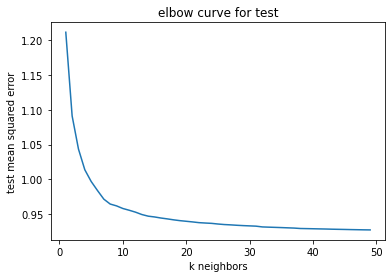

In [127]:
#plotting the curves
plt.plot(k,test)
plt.xlabel("k neighbors")
plt.ylabel("test mean squared error")
plt.title("elbow curve for test")

In [130]:
#creating instance of KNN
reg = KNN(n_neighbors = 50)
#fitting the model
reg.fit(train_x,train_y)
#predicting over the train set and calculating F1
test_predict = reg.predict(test_x)
k= sqrt(mse(test_predict,test_y))
print("test rmse ", k)

test rmse  0.9271022335714195


In [131]:
knn_train_score = reg.score(train_x,train_y)
knn_train_score*100

4.9700447684214

In [132]:
knn_test_score = reg.score(test_x,test_y)
knn_test_score*100

1.4833758357458482

In [133]:
#storing the value of train score which can be further used in other files for plotting the bar graph
%store knn_test_score

Stored 'knn_test_score' (float64)


In [134]:
#storing the value of test score which can be further used in other files for plotting the bar graph
%store knn_train_score

Stored 'knn_train_score' (float64)


# Linear Regression

In [181]:
df.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6
0,-73.953918,40.778873,-73.963875,40.771164,1,0,0,0,0,0
1,-73.988312,40.731743,-73.994751,40.694931,0,1,0,0,0,0
2,-73.997314,40.721458,-73.948029,40.774918,0,1,0,0,0,0
3,-73.961670,40.759720,-73.956779,40.780628,0,0,0,0,0,1
4,-74.017120,40.708469,-73.988182,40.740631,1,0,0,0,0,0


In [182]:
#separate features and target
x=df[:100000]
y=data['trip_duration_hour'][:100000]
x.shape,y.shape

((100000, 10), (100000,))

In [183]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state=56)

In [184]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as mse

In [185]:
#creating an instance of LR
lr = LR()
#fitting the model
lr.fit(train_x,train_y)

LinearRegression()

In [186]:
#predicting the train values and finding the RMSE
train_predict = lr.predict(train_x)
k = sqrt(mse(train_predict,train_y))
print("training rmse ",k)

training rmse  0.887036822989151


In [187]:
#predicting the test values and finding the RMSE
test_predict = lr.predict(test_x)
k = sqrt(mse(test_predict,test_y))
print("testing rmse ",k)

testing rmse  0.929558696099112


In [188]:
#computing the coefficients of above model
lr.coef_

array([ 1.32018565e+00, -8.59245852e-01,  1.16756507e+00, -1.14985569e+00,
        1.31503184e+12,  1.31503184e+12,  1.31503184e+12,  1.31503184e+12,
        1.31503184e+12,  1.31503184e+12])

# Plotting coefficients

Text(0.5, 1.0, 'coefficient plot')

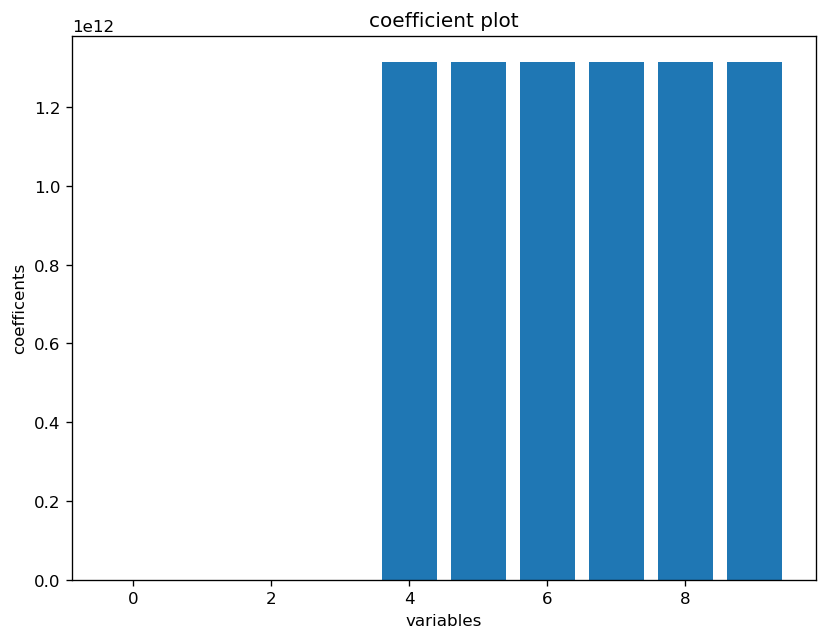

In [189]:
plt.figure(figsize=(8,6),dpi=120,facecolor="w",edgecolor="b")
x = range(len(train_x.columns))
y = lr.coef_
plt.bar(x,y)
plt.xlabel("variables")
plt.ylabel("coefficents")
plt.title("coefficient plot")

In [190]:
#calculating the residuals 
residuals = pd.DataFrame({
    "fitted_values":test_y,
    "predicted_values":test_predict
})
residuals["residuals"]=residuals["fitted_values"]-residuals["predicted_values"]
residuals.head()

,fitted_values,predicted_values,residuals
7528,0.389444,0.281250,0.108194
84252,0.694722,0.591797,0.102925
79111,0.120556,0.260742,-0.140187
37342,0.046111,0.386230,-0.340119
33021,0.096944,0.174805,-0.077860


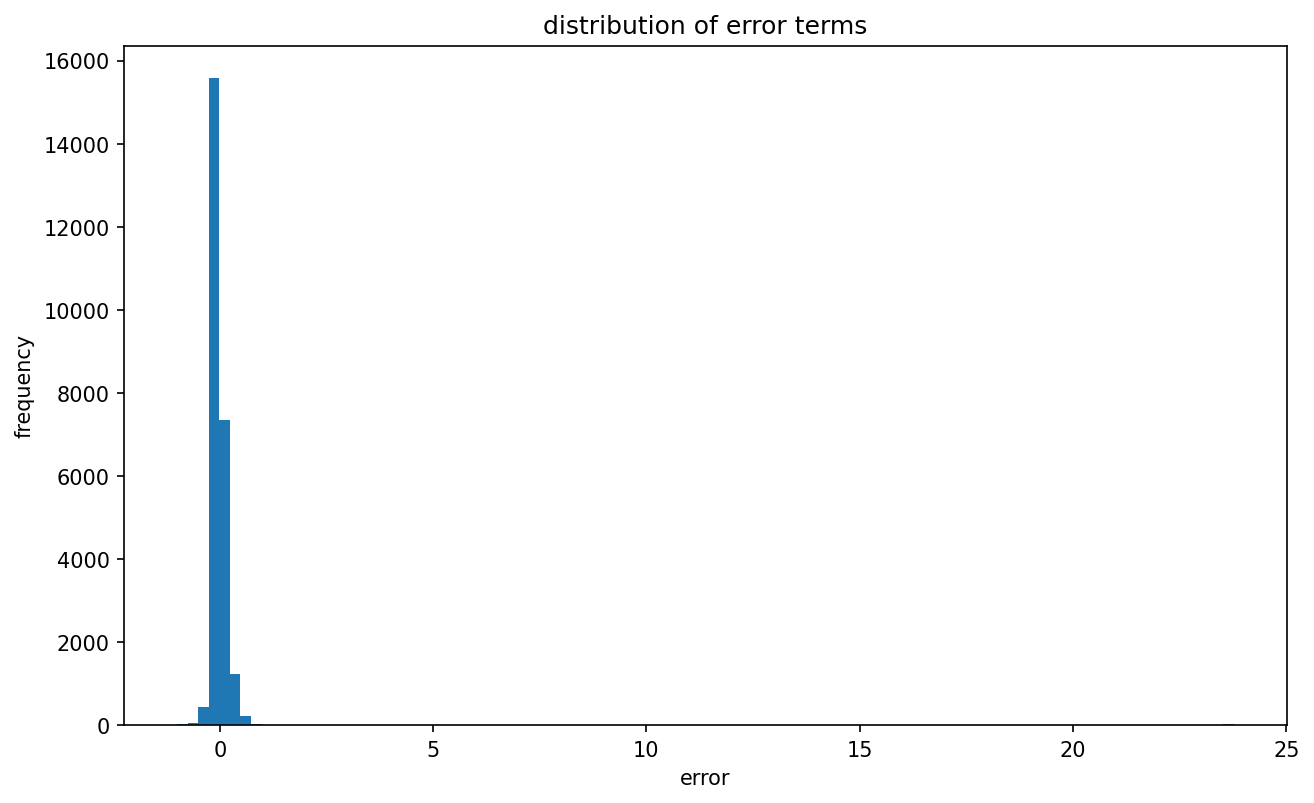

In [191]:
plt.figure(figsize=(10,6),dpi=150,facecolor="w",edgecolor="b")
plt.hist(residuals.residuals,bins=100)
plt.xlabel("error")
plt.ylabel("frequency")
plt.title("distribution of error terms")
plt.show()

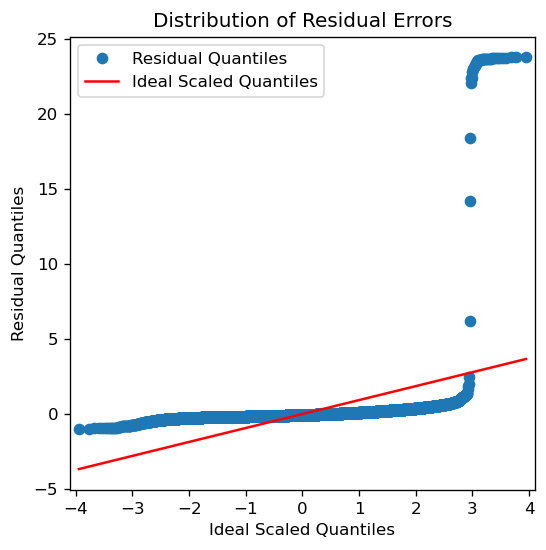

In [192]:
# importing the QQ-plot from the from the statsmodels
from statsmodels.graphics.gofplots import qqplot

## Plotting the QQ plot
fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
qqplot(residuals.residuals, line = 's' , ax = ax)
plt.xlabel('Ideal Scaled Quantiles')
plt.ylabel('Residual Quantiles')
plt.legend(["Residual Quantiles","Ideal Scaled Quantiles"])
plt.title('Distribution of Residual Errors')
plt.show()

In [193]:
#calculating the train score 

linear_train_score = lr.score(train_x,train_y)
linear_train_score*100

1.0478048793056027

In [194]:
#calculating the test score

linear_test_score = lr.score(test_x,test_y)
linear_test_score*100

0.9606222639432005

In [195]:
#storing the value of test score which can be further used in other files for plotting the bar graph
%store linear_test_score

Stored 'linear_test_score' (float64)


In [196]:
#storing the value of train score which can be further used in other files for plotting the bar graph
%store linear_train_score

Stored 'linear_train_score' (float64)


In [197]:
linear_train_score,knn_train_score

(0.010478048793056027, 0.049700447684214)

In [203]:
#assigning the train score values in x,y
x=["linear_train_score","knn_train_score"]
y=[0.010478048793056027, 0.049700447684214]

In [204]:
linear_test_score,knn_test_score

(0.009606222639432005, 0.014833758357458482)

In [205]:
#assigning the test score values in x,y
x1=["linear_test_score","knn_test_score"]
y1=[0.009606222639432005, 0.014833758357458482]

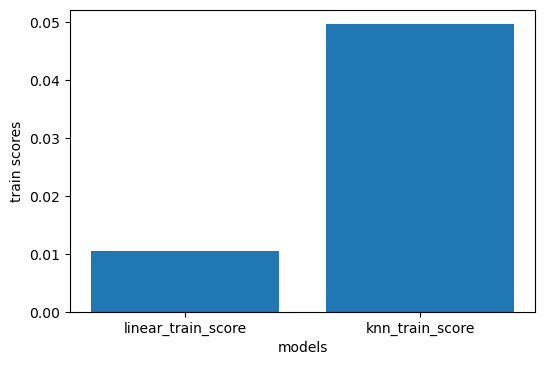

In [206]:
plt.figure(dpi=100)
plt.bar(x,y)
plt.xlabel("models")
plt.ylabel("train scores")
plt.show()

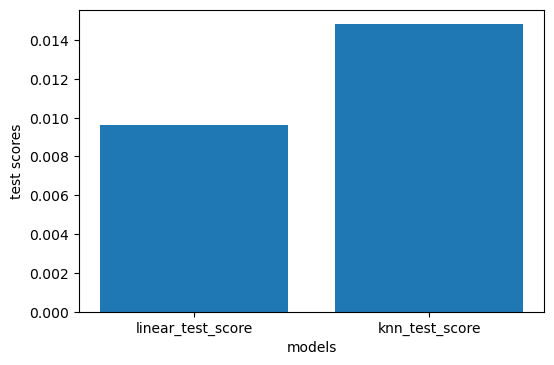

In [207]:
plt.figure(dpi=100)
plt.bar(x1,y1)
plt.xlabel("models")
plt.ylabel("test scores")
plt.show()

# Linear Model has least error, hence Linear model should be preferred